# Environment setting

In [1]:
import tensorflow as tf
from tensorflow import keras
import sklearn

!python --version
print(tf.__version__)
print(keras.__version__)
print(sklearn.__version__)

Python 3.9.16
2.12.0
2.12.0
1.2.2


# Regression (with California housing dataset)

## Import package, dataset

In [35]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.keys())
print(housing.feature_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [36]:
x_data = housing.data
y_data = housing.target

print(x_data.shape)
print(y_data.shape)

(20640, 8)
(20640,)


## Data preprocessing

train/test split

In [37]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(16512, 8)
(16512,)
(4128, 8)
(4128,)


normalization

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

extract MedInc and HouseAge

In [6]:
x_train_selected = x_train_scaled[:, 0:2]
x_test_selected = x_test_scaled[:, 0:2]

print(x_train_selected.shape)
print(x_test_selected.shape)

(16512, 2)
(4128, 2)


## Model Import

### sklearn MLPRegressor (with all features)

In [7]:
# from sklearn.neural_network import MLPRegressor

# regr = MLPRegressor(hidden_layer_sizes=(4, ), activation='relu')
# regr.fit(x_train_selected, y_train)
# y_test_hat = regr.predict(x_test_selected)

In [8]:
# print(regr)
# print(regr.loss_curve_)
# print(regr.score(x_test_selected, y_test))

MLPRegressor(hidden_layer_sizes=(4,))
[2.7877704517987145, 1.9205397323284936, 1.294264136516764, 0.8828591249245107, 0.6445643094873906, 0.5231675534862417, 0.4625791788220333, 0.428802331174526, 0.4064096211819356, 0.3896440460278133, 0.376798366945156, 0.3669353060029098, 0.35922513892271174, 0.35325832686204056, 0.348519708291632, 0.3445291801147135, 0.341169914649, 0.33825530689617445, 0.3358154453851365, 0.3337172226709964, 0.3320168813854811, 0.3304401850179523, 0.3295296688967511, 0.32889080716922287, 0.32828483121828156, 0.3279096781464988, 0.3274877485331936, 0.3271190721177388, 0.32681100022486753, 0.32653101003889573, 0.32623059012466127, 0.32605036249443936, 0.3258637382958547, 0.325604681964461, 0.32536902791826533, 0.3251182422640655, 0.325004756229899, 0.32477970825425734, 0.32459110247976336, 0.32441790965839024, 0.3241962864654925, 0.3240827550971317, 0.32395224512410015, 0.3237094907986998, 0.3234786763829864, 0.3234056920655827, 0.3232326548546744, 0.323217243589750

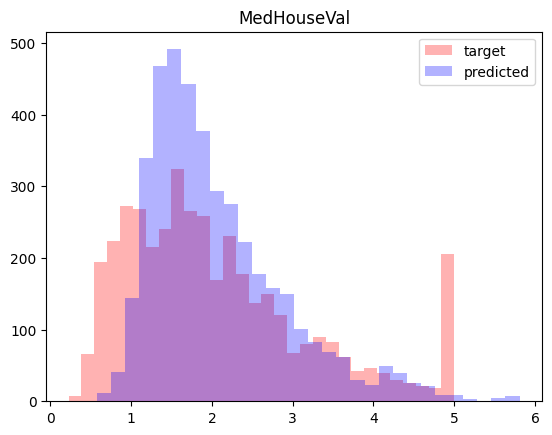

In [9]:
# plt.hist(y_test, 30, color='red', alpha=0.3)
# plt.hist(y_test_hat, 30, color='blue', alpha=0.3)
# plt.title('MedHouseVal')
# plt.legend(['target', 'predicted'])

### sklearn LinearRegression (with all features)

In [10]:
# from sklearn.linear_model import LinearRegression

# regr3 = LinearRegression()
# regr3.fit(x_train_scaled, y_train)
# y_test_hat = regr3.predict(x_test_scaled)

# print(regr3)
# print(regr3.score(x_test_scaled, y_test))

LinearRegression()
0.6279510165224079


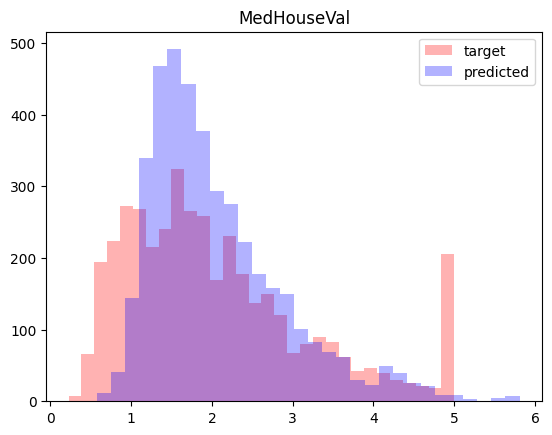

In [11]:
# plt.hist(y_test, 30, color='red', alpha=0.3)
# plt.hist(y_test_hat, 30, color='blue', alpha=0.3)
# plt.title('MedHouseVal')
# plt.legend(['target', 'predicted'])

### Keras sequential API (with all features)

In [39]:
from keras import layers, models

input_shape = (x_train_scaled.shape[1], )
print(input_shape)

(8,)


In [63]:
regr_model = models.Sequential()

# regr_model.add(layers.Dense(units = 4, activation = 'relu', input_shape = input_shape))
# regr_model.add(layers.Dense(units = 2, activation = 'relu'))
# regr_model.add(layers.Dense(units = 1, activation = 'linear'))

regr_model.add(layers.Dense(units = 6, activation = 'relu', input_shape = input_shape))
regr_model.add(layers.Dense(units = 4, activation = 'relu'))
regr_model.add(layers.Dense(units = 1, activation = 'linear'))

regr_model.compile(loss='mean_squared_error')
regr_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 6)                 54        
                                                                 
 dense_46 (Dense)            (None, 4)                 28        
                                                                 
 dense_47 (Dense)            (None, 1)                 5         
                                                                 
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________


## Model Fit

In [64]:
history = regr_model.fit(x_train_scaled, y_train, validation_data=[x_test_scaled, y_test], epochs = 20)

Epoch 1/20
516/516 [==============================] - 1s 2ms/step - loss: 1.1441 - val_loss: 0.6309
Epoch 2/20
516/516 [==============================] - 1s 2ms/step - loss: 0.5657 - val_loss: 0.5039
Epoch 3/20
516/516 [==============================] - 1s 2ms/step - loss: 0.4803 - val_loss: 0.4528
Epoch 4/20
516/516 [==============================] - 1s 2ms/step - loss: 0.4369 - val_loss: 0.4289
Epoch 5/20
516/516 [==============================] - 1s 3ms/step - loss: 0.4138 - val_loss: 0.4173
Epoch 6/20
516/516 [==============================] - 1s 2ms/step - loss: 0.4029 - val_loss: 0.4014
Epoch 7/20
516/516 [==============================] - 1s 2ms/step - loss: 0.3969 - val_loss: 0.4098
Epoch 8/20
516/516 [==============================] - 1s 2ms/step - loss: 0.3905 - val_loss: 0.3901
Epoch 9/20
516/516 [==============================] - 1s 2ms/step - loss: 0.3857 - val_loss: 0.3854
Epoch 10/20
516/516 [==============================] - 1s 2ms/step - loss: 0.3801 - val_loss: 0.3858

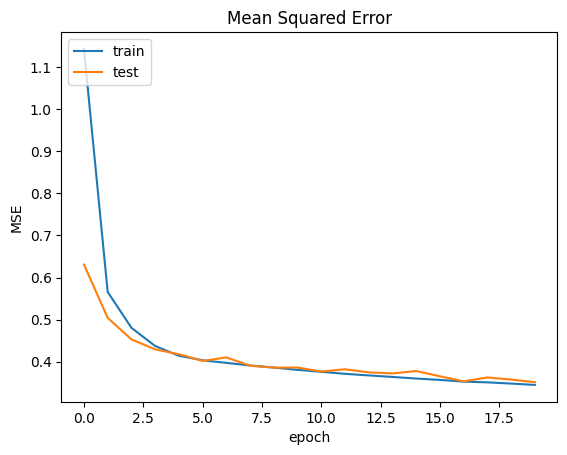

In [65]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Classification (with MNIST dataset)

## Import package, dataset

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
print(mnist.keys())

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [17]:
x_data = mnist.data
y_data = mnist.target

print(x_data.shape)
print(y_data.shape)

(70000, 784)
(70000,)


## Data preprocessing

train/test split

In [18]:
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(56000, 784)
(56000,)
(14000, 784)
(14000,)


normalization

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

print(np.max(np.max(x_train_scaled)), np.min(np.min(x_train_scaled)))
print(np.max(np.max(x_test_scaled)), np.min(np.min(x_test_scaled)))

1.0 0.0
1.0 0.0


one-hot encoding

In [20]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
y_train_onehot = encoder.fit_transform(y_train)
y_test_onehot = encoder.fit_transform(y_test)

print(y_train[0:5])
print(y_train_onehot[0:5])

27431    5
18564    0
11991    9
4767     8
33451    8
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
[[0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 1 0]]


## Model Import

### sklearn MLPClassifier (with scaled x, one-hot encoded y)

In [21]:
# from sklearn.neural_network import MLPClassifier
# from sklearn import metrics

# clf = MLPClassifier(hidden_layer_sizes=(50, ))
# clf.fit(x_train_scaled, y_train_onehot)
# y_test_hat = clf.predict(x_test_scaled)

### keras sequential API (with scaled x, one-hot encoded y)

In [22]:
from keras import layers, models

input_shape = (x_train_scaled.shape[1], )
print(input_shape)

(784,)


In [25]:
clf_model_seq = models.Sequential()
clf_model_seq.add(layers.Dense(units = 30, activation = 'relu', input_shape = input_shape))
clf_model_seq.add(layers.Dense(units = 50, activation = 'relu'))
clf_model_seq.add(layers.Dense(units = 10, activation = 'softmax'))

clf_model_seq.compile(loss='categorical_crossentropy', metrics=['accuracy'])
clf_model_seq.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 30)                23550     
                                                                 
 dense_7 (Dense)             (None, 50)                1550      
                                                                 
 dense_8 (Dense)             (None, 10)                510       
                                                                 
Total params: 25,610
Trainable params: 25,610
Non-trainable params: 0
_________________________________________________________________


## Model Fit

In [27]:
history = clf_model_seq.fit(x_train_scaled, y_train_onehot, validation_data=[x_test_scaled, y_test_onehot], 
                            batch_size = 32, epochs = 30)

Epoch 1/30
1750/1750 [==============================] - 7s 4ms/step - loss: 0.1776 - accuracy: 0.9471 - val_loss: 0.1624 - val_accuracy: 0.9513
Epoch 2/30
1750/1750 [==============================] - 6s 3ms/step - loss: 0.1428 - accuracy: 0.9579 - val_loss: 0.1461 - val_accuracy: 0.9558
Epoch 3/30
1750/1750 [==============================] - 7s 4ms/step - loss: 0.1208 - accuracy: 0.9631 - val_loss: 0.1339 - val_accuracy: 0.9601
Epoch 4/30
1750/1750 [==============================] - 4s 2ms/step - loss: 0.1071 - accuracy: 0.9680 - val_loss: 0.1283 - val_accuracy: 0.9631
Epoch 5/30
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0977 - accuracy: 0.9719 - val_loss: 0.1226 - val_accuracy: 0.9641
Epoch 6/30
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0906 - accuracy: 0.9727 - val_loss: 0.1219 - val_accuracy: 0.9656
Epoch 7/30
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0844 - accuracy: 0.9752 - val_loss: 0.1252 - val_accuracy:

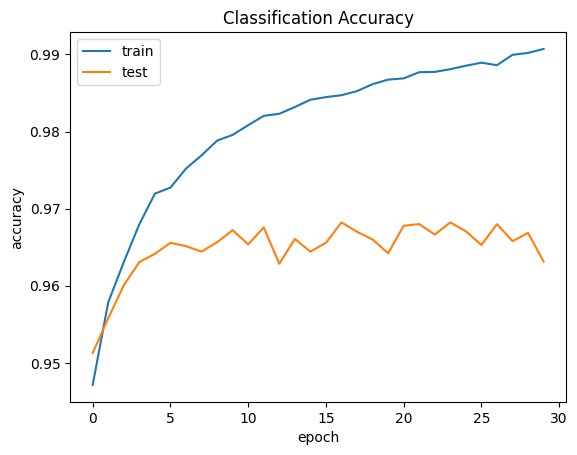

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

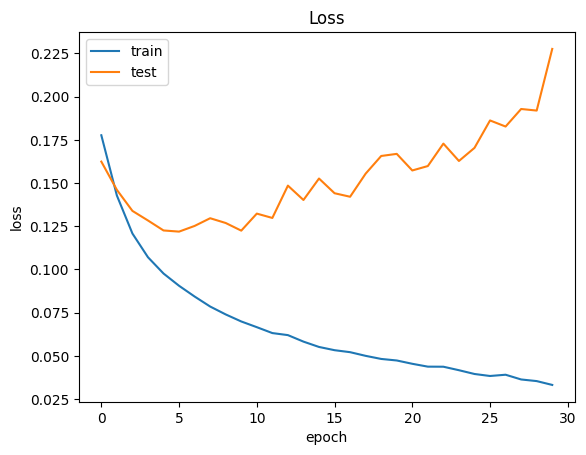

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## keras functional API

In [30]:
input_shape = (x_train_scaled.shape[1], )

input = layers.Input(shape=input_shape)
hidden_1st = layers.Dense(40, activation='relu')(input)
hidden_2nd = layers.Dense(50, activation='relu')(hidden_1st)
output = layers.Dense(10, activation='softmax')(hidden_2nd)

clf_model_func = models.Model(input, output)

clf_model_func.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = clf_model_func.fit(x_train_scaled, y_train_onehot, validation_data=[x_test_scaled, y_test_onehot], 
                            batch_size = 32, epochs = 30)

Epoch 1/30
1750/1750 [==============================] - 9s 5ms/step - loss: 0.1006 - accuracy: 0.9699 - val_loss: 0.1211 - val_accuracy: 0.9648
Epoch 2/30
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0875 - accuracy: 0.9729 - val_loss: 0.1046 - val_accuracy: 0.9702
Epoch 3/30
1750/1750 [==============================] - 8s 4ms/step - loss: 0.0770 - accuracy: 0.9763 - val_loss: 0.1081 - val_accuracy: 0.9711
Epoch 4/30
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0696 - accuracy: 0.9786 - val_loss: 0.1310 - val_accuracy: 0.9658
Epoch 5/30
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0650 - accuracy: 0.9812 - val_loss: 0.1364 - val_accuracy: 0.9646
Epoch 6/30
1750/1750 [==============================] - 5s 3ms/step - loss: 0.0586 - accuracy: 0.9826 - val_loss: 0.1119 - val_accuracy: 0.9735
Epoch 7/30
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0548 - accuracy: 0.9836 - val_loss: 0.1238 - val_accuracy:

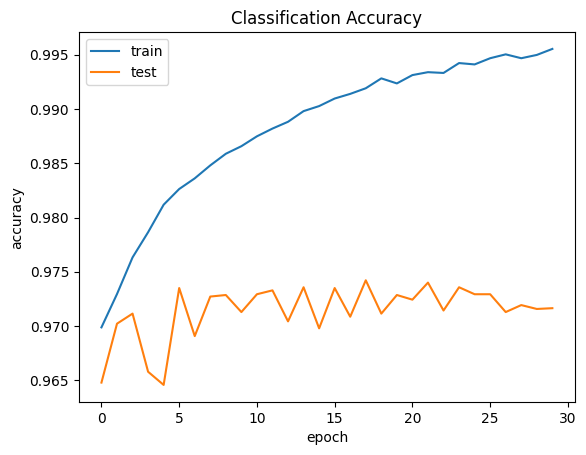

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Classification Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

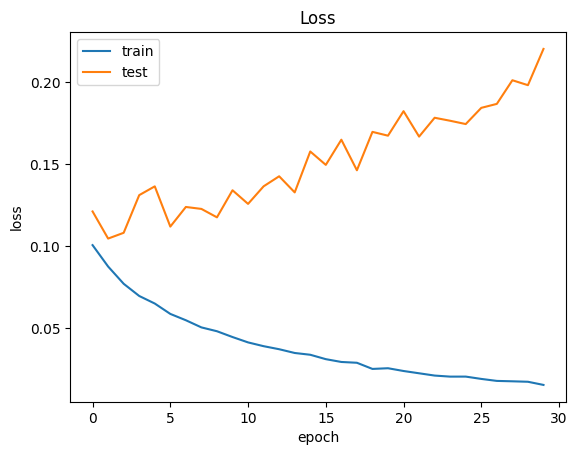

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Homework

### 1. Generate regression model for California housing dataset with keras functional API

### 2. Generate two classification models for MNIST dataset with keras sequential/functional API